Import, inspect and transform data

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [295]:
data = pd.read_csv("Data/digit-recognizer/train.csv")

In [296]:
y = data["label"]
y = y.values
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [297]:
X = data.drop(columns={"label"}).astype('int16')
X = X.values
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [300]:
from sklearn import preprocessing
scaler = preprocessing.Binarizer().fit(X)
scaler

Binarizer()

In [301]:
X = scaler.transform(X)

In [302]:
X_image = X[:100].reshape(100,28,28)

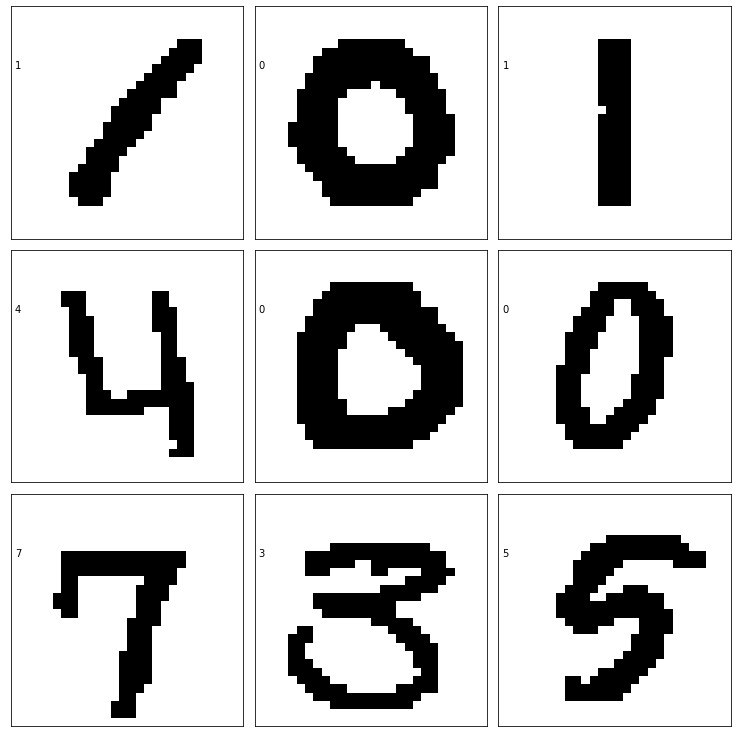

In [303]:
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(X_image[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y[i]))

Split data into test and train

In [232]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

In [233]:
X_train.shape

(31500, 784)

In [309]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
X_new_train = SelectPercentile(score_func=f_classif, percentile=80).fit_transform(X_train, y_train)

C:\Users\jwr19\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  0   1   2   3   4   5   6   7   8   9  10  11  12  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  52  53  54  55  56  57  58
  82  83  84  85  86 111 112 139 140 141 168 196 392 420 421 448 476 532
 560 644 645 671 672 673 699 700 701 727 728 729 730 731 754 755 756 757
 758 759 760 780 781 782 783] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\jwr19\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [305]:
X_new_train.shape

(31500, 627)

# Naive Bayes

In [234]:
from sklearn.naive_bayes import GaussianNB

In [235]:
gnb = GaussianNB()

In [236]:
gnb.fit(X_train, y_train)

GaussianNB()

In [237]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [238]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 10500 points : 4663


In [239]:
from sklearn.metrics import confusion_matrix

In [240]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 918    2    3    1    3    5   50    0   34   17]
 [   2 1118    0    2    0    2   15    0   27    5]
 [  95   30  250   83    6   11  303    1  246   19]
 [  66   53    4  350    6    2   81    7  433   86]
 [  20   15    8    5  159    8  106    3  221  473]
 [  90   30   11   22    8   54   61    1  572  100]
 [  12   10    6    0    1    4  983    0   18    0]
 [   5    8    1    5   11    3    3  342   56  666]
 [  14  133    4    9    7    4   24    1  680  140]
 [   7    8    1    2    6    0    0   12   28  983]]


In [241]:
from sklearn.naive_bayes import BernoulliNB

In [242]:
bnb = BernoulliNB()

In [243]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [244]:
y_pred = bnb.fit(X_train, y_train).predict(X_test)

In [245]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 10500 points : 1747


In [246]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 939    2    3    5    3   42   16    0   20    3]
 [   0 1117   11    5    0   17    5    0   15    1]
 [  13   16  857   34   21    7   41   13   40    2]
 [   8   18   56  871    7   24   11    9   64   20]
 [   3   14    4    0  813    6   11    4   20  143]
 [  25   11    6  129   35  664   21    8   18   32]
 [  14   22   14    0    8   36  936    0    4    0]
 [   2   19    8    5   29    3    1  925   27   81]
 [  10   48   12   72    7   34   10    4  770   49]
 [  10   14    6    9   70    6    0   39   32  861]]


In [247]:
bnb.class_count_

array([3099., 3513., 3133., 3263., 3054., 2846., 3103., 3301., 3047.,
       3141.])

In [248]:
bnb.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [249]:
bnb.get_params()

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [250]:
bnb.score(X_test, y_test)

0.8336190476190476

In [251]:
from sklearn.naive_bayes import CategoricalNB

cnb = BernoulliNB()

cnb.fit(X_train, y_train)

BernoulliNB()

In [252]:
y_pred = cnb.fit(X_train, y_train).predict(X_test)

In [253]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 10500 points : 1747


In [254]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 939    2    3    5    3   42   16    0   20    3]
 [   0 1117   11    5    0   17    5    0   15    1]
 [  13   16  857   34   21    7   41   13   40    2]
 [   8   18   56  871    7   24   11    9   64   20]
 [   3   14    4    0  813    6   11    4   20  143]
 [  25   11    6  129   35  664   21    8   18   32]
 [  14   22   14    0    8   36  936    0    4    0]
 [   2   19    8    5   29    3    1  925   27   81]
 [  10   48   12   72    7   34   10    4  770   49]
 [  10   14    6    9   70    6    0   39   32  861]]


In [255]:
cnb.score(X_test, y_test)

0.8336190476190476

In [256]:
print(np.around(100*confusion, decimals=1))

[[ 93900    200    300    500    300   4200   1600      0   2000    300]
 [     0 111700   1100    500      0   1700    500      0   1500    100]
 [  1300   1600  85700   3400   2100    700   4100   1300   4000    200]
 [   800   1800   5600  87100    700   2400   1100    900   6400   2000]
 [   300   1400    400      0  81300    600   1100    400   2000  14300]
 [  2500   1100    600  12900   3500  66400   2100    800   1800   3200]
 [  1400   2200   1400      0    800   3600  93600      0    400      0]
 [   200   1900    800    500   2900    300    100  92500   2700   8100]
 [  1000   4800   1200   7200    700   3400   1000    400  77000   4900]
 [  1000   1400    600    900   7000    600      0   3900   3200  86100]]
